# Spectral Clustering

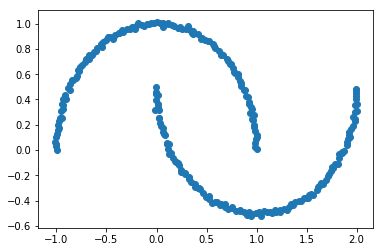

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as mh
from sklearn.datasets import make_moons
x,y = make_moons(250,random_state=19,noise=0.01) #initial dataset
plt.scatter(x[:,0],x[:,1]) #visualising the dataset

# Defining Affinity and Diagonal Matrix

In [8]:
sigma_square =0.04 #scaling parameter
k=2 #clusters
def Affinity_Matrix():
    amat = np.zeros((x.shape[0],x.shape[0]))
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            if i!=j:
                amat[i,j] = np.exp(-sum((x[i]-x[j])**2)/(2*sigma_square))
    return amat

def Diagonal_Mat_Inverse():
    dmat = np.zeros((x.shape[0],x.shape[0]))
    for i in range(x.shape[0]):
        dmat[i,i] = sum(Affinity[i,:])**-0.5
    return dmat
Affinity = Affinity_Matrix()
Diagonal= Diagonal_Mat_Inverse()

# Eigenvalues and Eigenvectors

In [9]:
B=np.dot(Diagonal,Affinity)
C=np.dot(B,Diagonal)
eigenval,eigenvec = np.linalg.eig(C)
print('Eigenvalue:\n',eigenval)
print('Eigenvector:\n',eigenvec)
upto_kth= eigenvec[:,:k]
upto_kth

Eigenvalue:
 [ 1.          0.99432693  0.97365882  0.97184596  0.91012032  0.89872763
  0.80658816  0.80881062  0.69196393  0.68430452  0.56332788  0.56732185
  0.44216859  0.43507725  0.32974052  0.32366673  0.23120946  0.23256826
  0.15491896  0.15445608  0.0916349   0.09291398  0.04350702  0.04363168
  0.00903409  0.00839059 -0.01368536 -0.01437923 -0.09906717 -0.0996616
 -0.02988974 -0.03056717 -0.08998496 -0.09144457 -0.09108969 -0.08954654
 -0.0864798  -0.0843767  -0.08431955 -0.08233888 -0.0800742  -0.07418122
 -0.07763373 -0.07599867 -0.07545468 -0.03979279 -0.03997638 -0.07281857
 -0.07120815 -0.07098519 -0.06941207 -0.06995195 -0.06807634 -0.06622214
 -0.06684149 -0.06532789 -0.04605971 -0.04626053 -0.06386699 -0.06424405
 -0.06340348 -0.06242836 -0.06144045 -0.06194201 -0.06101512 -0.06023162
 -0.05956029 -0.05966301 -0.0491635  -0.05907128 -0.05873182 -0.05847998
 -0.05861115 -0.0577479  -0.04967426 -0.05750324 -0.05025768 -0.05685683
 -0.05661985 -0.05665878 -0.0506072  -0

array([[ 0.0648533 , -0.04502482],
       [ 0.06471428, -0.07995737],
       [ 0.06491495, -0.06484475],
       [ 0.06480941,  0.04616004],
       [ 0.05812156, -0.03435329],
       [ 0.06506919, -0.07208271],
       [ 0.06445954, -0.07737548],
       [ 0.06490641,  0.07865543],
       [ 0.06525437, -0.0532745 ],
       [ 0.06492762,  0.0619308 ],
       [ 0.05853195,  0.07522942],
       [ 0.06523539, -0.04798999],
       [ 0.06495623, -0.07059802],
       [ 0.06503716, -0.05710371],
       [ 0.06443226, -0.08171481],
       [ 0.06499068, -0.07360418],
       [ 0.06533972, -0.05794646],
       [ 0.05051752,  0.02318553],
       [ 0.06502112, -0.05791117],
       [ 0.06492608, -0.06759807],
       [ 0.06569793, -0.05134845],
       [ 0.06451747, -0.08131222],
       [ 0.06136717, -0.07918166],
       [ 0.06514765,  0.07764984],
       [ 0.06569636, -0.04976203],
       [ 0.06129206, -0.03811943],
       [ 0.06328648,  0.04155641],
       [ 0.06554186, -0.05126009],
       [ 0.06501812,

# Transformed dataset

In [11]:
transformed=np.zeros(upto_kth.shape)
for i in range(upto_kth.shape[0]):
    transformed[i] = upto_kth[i]/(np.sqrt(sum(upto_kth[i]**2))) 
transformed

array([[ 0.82144232, -0.57029161],
       [ 0.62912121, -0.77730721],
       [ 0.70748925, -0.70672411],
       [ 0.81451969,  0.58013592],
       [ 0.86086985, -0.50882522],
       [ 0.67007199, -0.74229612],
       [ 0.64006701, -0.76831909],
       [ 0.63647442,  0.77129781],
       [ 0.77462849, -0.63241656],
       [ 0.72360913,  0.69020999],
       [ 0.6140725 ,  0.78924962],
       [ 0.80551667, -0.59257312],
       [ 0.67709069, -0.73589958],
       [ 0.7514522 , -0.65978754],
       [ 0.61917397, -0.78525384],
       [ 0.66188391, -0.74960635],
       [ 0.74816668, -0.66351083],
       [ 0.90884893,  0.41712542],
       [ 0.74675529, -0.66509889],
       [ 0.69270908, -0.72121711],
       [ 0.78789667, -0.61580747],
       [ 0.62156306, -0.78336413],
       [ 0.61258027, -0.79040838],
       [ 0.64273951,  0.7660848 ],
       [ 0.79713855, -0.60379643],
       [ 0.84916748, -0.52812364],
       [ 0.83589849,  0.54888407],
       [ 0.78770058, -0.61605828],
       [ 0.7100773 ,

# Importing Kmeans to find Clusters

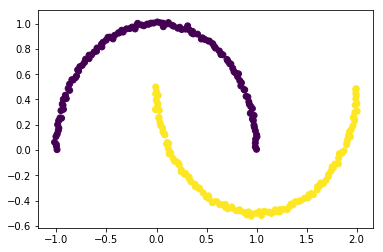

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
cluster = kmeans.fit_predict(transformed)
plt.scatter(x[:,0],x[:,1],c=cluster)


# applying in the orignal dataset

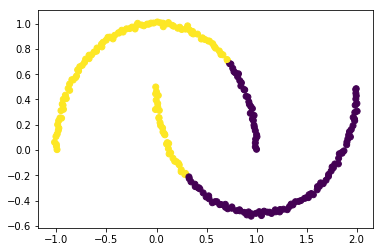

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
cluster = kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=cluster)
